In [33]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
%matplotlib inline
import pandas as pd

np.set_printoptions(precision=3)

In [34]:
err = 0.1

x = np.linspace(2, 5, 100)
y = 2+0.5*x+2*err*np.random.rand(len(x))-err

In [35]:
data = pd.DataFrame(np.column_stack((x,y)), columns=list('xy'))
data.head()

x         y
0  2.000000  2.900638
1  2.030303  2.955154
2  2.060606  3.067490
3  2.090909  3.054260
4  2.121212  3.049272

In [36]:

data.describe()

x           y
count  100.000000  100.000000
mean     3.500000    3.744583
std      0.879136    0.449430
min      2.000000    2.900638
25%      2.750000    3.367362
50%      3.500000    3.754356
75%      4.250000    4.128715
max      5.000000    4.466907

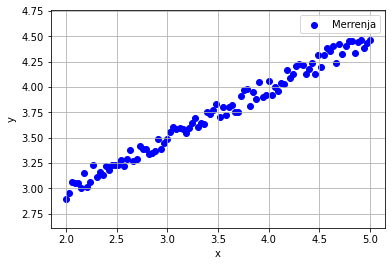

In [37]:

plt.scatter(x, y, color='b', label='Merrenja');
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

In [38]:

xx = np.zeros((len(x), 2)) 
xx[:, 0] = x
xx[:, 1] = y

(-1.672214307015682,
 1.6738080060620333,
 -0.9249218016962248,
 0.8565644427300834)

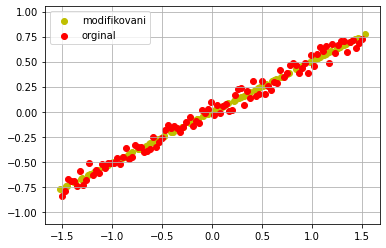

In [39]:
xx = xx - xx.mean(axis=0)

plt.scatter(cc[:,0:1],cc[:,1:2], color='y', label='modifikovani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')

In [40]:
n = xx.shape[0]
a = xx-np.dot(np.ones((n,n)),xx)/n

data = pd.DataFrame(a, columns=list('xy'))
data.describe()

x             y
count  1.000000e+02  1.000000e+02
mean   1.776357e-17 -2.109424e-16
std    8.791361e-01  4.494301e-01
min   -1.500000e+00 -8.439452e-01
25%   -7.500000e-01 -3.772205e-01
50%   -1.387779e-17  9.773663e-03
75%    7.500000e-01  3.841326e-01
max    1.500000e+00  7.223239e-01

In [41]:
# covariance matrix
cm = np.dot(a.T, a)

print(cm)

[[76.515 38.801]
 [38.801 19.997]]


In [42]:
w,v = linalg.eig(cm)
w

array([96.257,  0.255])

In [43]:
v

array([[ 0.891, -0.453],
       [ 0.453,  0.891]])

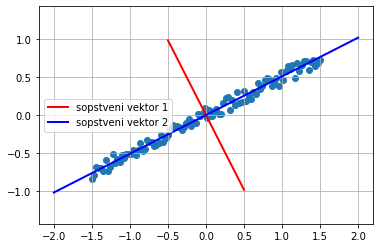

In [44]:
x1 = np.array([-0.5, 0.5])
f = v[0,:]
y1 = x1*f[0]/f[1]
plt.plot(x1, y1, 'r-', lw=2, label='sopstveni vektor 1')

x2 = np.array([-2, 2])
f2 = v[1,:]
y2 = x2*f2[0]/f2[1]
plt.plot(x2, y2, 'b-', lw=2, label='sopstveni vektor 2')

plt.scatter(xx[:,0:1],xx[:,1:2])

plt.axis('equal')
plt.grid(True)
plt.legend()

In [45]:
zz = np.dot(xx[:,0:2], v)

In [46]:
data = pd.DataFrame(zz, columns=list('xy'))
data.describe()

x             y
count  1.000000e+02  1.000000e+02
mean  -2.908784e-16  3.397282e-16
std    9.860504e-01  5.071776e-02
min   -1.719612e+00 -9.151422e-02
25%   -8.258685e-01 -4.379603e-02
50%    1.268969e-02  3.228682e-04
75%    8.510944e-01  4.164572e-02
max    1.664459e+00  1.001689e-01

(-1.8888152249682848,
 1.833662810849356,
 -0.9222586087263791,
 0.8006373903633224)

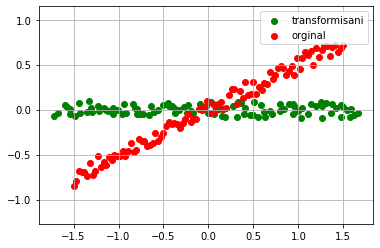

In [47]:
plt.scatter(zz[:,0:1],zz[:,1:2], color='g', label='transformisani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')

In [48]:
zz[:,1] = 0

In [49]:
cc = np.dot(zz[:,0:2], v.T)

(-1.6842666501378651,
 1.6516317452446598,
 -0.9238821040015048,
 0.8347307911409636)

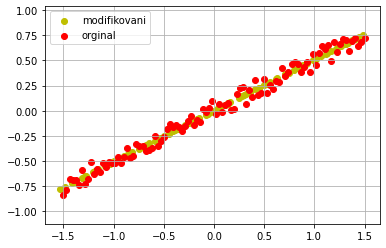

In [50]:

plt.scatter(cc[:,0:1],cc[:,1:2], color='y', label='modifikovani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')